In [63]:
from preprocess import prep
import numpy as np
from plotter import plot
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [68]:
import pymongo
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client['flochat-ai']
train_data = db.train
X_raw = []
y_raw = []
shuff = []
for sentence in train_data.find({"label" : {'$in' : ['food', 'movie']}}):
    shuff.append((sentence['text'], sentence['label']))
np.random.shuffle(shuff)
for X, y in shuff:
    X_raw.append(X)
    y_raw.append(y)

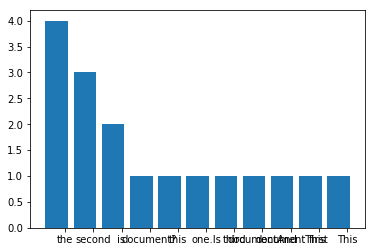

In [82]:
X_raw = [
    'This is the first document',
    'This is the second second document',
    'And the third one.',
    'Is this the second document?'
]

y_raw = [
    'one',
    'two',
    'one',
    'two'
]
from word_freq import word_frequency
wf = word_frequency("".join(X_raw).split(" "))
wf.plot()

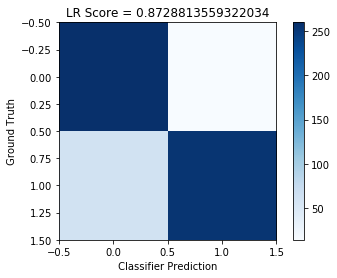

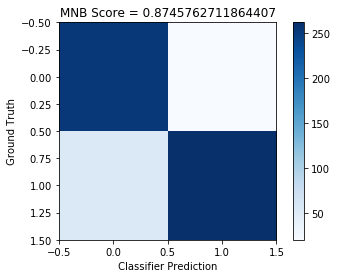

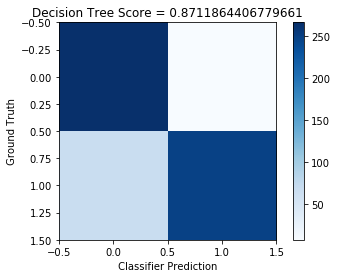

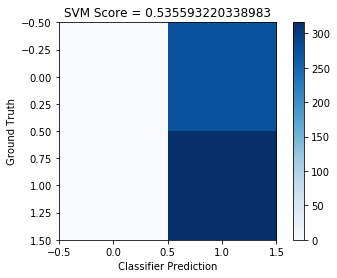

In [69]:
"""
PREPARE RAW INPUT FOR CLASSIFIER
"""
p = prep(X_raw, y_raw)

"""
train test split
"""
X_train, X_test, y_train, y_test = p.get_train_test()

## CLASSIFIERS

models = []
models.append(('LR', LogisticRegression()))
models.append(('MNB', MultinomialNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

p = plot()
for name, clf in models:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    name = "{} {} {}".format(name,'Score =', score)
    p.cnf_mtx(y_test, pred, name=name)
